In [1]:
import pandas as pd

df = pd.read_csv("Datafile.csv")
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [2]:
df.isnull().sum()
df['holiday'].fillna('No', inplace=True)


/tmp/ipython-input-3727144845.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['holiday'].fillna('No', inplace=True)


In [3]:
df['date_time'] = pd.to_datetime(df['date_time'],dayfirst = True)

df['hour'] = df['date_time'].dt.hour
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['weekday'] = df['date_time'].dt.weekday

df.drop('date_time', axis=1, inplace=True)

df[['hour', 'day', 'month', 'weekday']].head()


,hour,day,month,weekday
0,9,2,10,1
1,10,2,10,1
2,11,2,10,1
3,12,2,10,1
4,13,2,10,1


In [4]:
df['holiday'].fillna('No', inplace =True)

df['holiday'] = df['holiday'].map({'Yes':1, 'No':0})
df.head()

/tmp/ipython-input-1961190867.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['holiday'].fillna('No', inplace =True)


,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,hour,day,month,weekday
0,5545,0.0,288.28,0.0,0.0,40,Clouds,scattered clouds,9,2,10,1
1,4516,0.0,289.36,0.0,0.0,75,Clouds,broken clouds,10,2,10,1
2,4767,0.0,289.58,0.0,0.0,90,Clouds,overcast clouds,11,2,10,1
3,5026,0.0,290.13,0.0,0.0,90,Clouds,overcast clouds,12,2,10,1
4,4918,0.0,291.14,0.0,0.0,75,Clouds,broken clouds,13,2,10,1


In [5]:
categorical_cols = ['weather_main', 'weather_description']

df = pd.get_dummies(
    df,
    columns=[col for col in categorical_cols if col in df.columns],
    drop_first=True
)

df.head()


,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,hour,day,month,weekday,...,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
0,5545,0.0,288.28,0.0,0.0,40,9,2,10,1,...,False,False,False,False,False,False,False,False,False,False
1,4516,0.0,289.36,0.0,0.0,75,10,2,10,1,...,False,False,False,False,False,False,False,False,False,False
2,4767,0.0,289.58,0.0,0.0,90,11,2,10,1,...,False,False,False,False,False,False,False,False,False,False
3,5026,0.0,290.13,0.0,0.0,90,12,2,10,1,...,False,False,False,False,False,False,False,False,False,False
4,4918,0.0,291.14,0.0,0.0,75,13,2,10,1,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()
df.fillna(0,inplace = True)


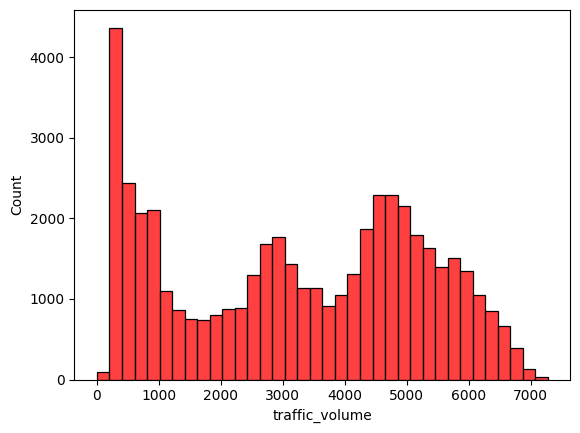

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['traffic_volume'], color = 'red')
sns.set_style("darkgrid")

plt.show()

In [8]:
X = df.drop('traffic_volume',axis = 1)
y = df['traffic_volume']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X,y, test_size = 0.2, random_state = 42)

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr.predict(X_test[:1])[0]

np.float64(2347.703163848662)

In [11]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [12]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
from sklearn.metrics import mean_absolute_error

print("Linear Regreesion MAE:", mean_absolute_error(y_test,lr.predict(X_test)))
print("Decision Tree MAE:", mean_absolute_error(y_test, dt.predict(X_test)))
print("Random Forest MAE:", mean_absolute_error(y_test, rf.predict(X_test)))

Linear Regreesion MAE: 1582.3485744349318
Decision Tree MAE: 274.56290841199046
Random Forest MAE: 220.62655429934657


In [14]:
#Here the best model is Random Forest Regressor with lowest MAE
import joblib
joblib.dump(rf,"traffic_model.pkl")

['traffic_model.pkl']